In [1]:
# Step 1: Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Step2: Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values  # age, salary
y = dataset.iloc[:, 4].values       # purchased

## Step 2(a): Clearing Data
dataset.describe() # count, mean, std, min, max, 25%, 50%, 75%
dataset.info()	 # names > cols, data type, memory usage
print(dataset.isnull().sum())  # Report missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [3]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,   # dependent, independent variables
                                                    test_size = 0.25, # 25% test size
                                                    random_state = 0) # due to this our trained value is fixed else it may very


In [4]:
# Step 3(a): Features either standardiation or normalization
## Distance b/w age^2 & salary^2 is dominant is salary as it's greater
## Standization = X-mean(X)/S.D(X) 
## Normalization = X-min(x)/(max(x)-min(x))
from sklearn.preprocessing import StandardScaler                # Standrization of dependent variables
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)  
X_test = sc_X.transform(X_test) 

In [5]:
# Step 5: Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
# Step 5: Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Step 6: Making the Confusion Matrix -> This contain right/wromg predictions to make our model robust 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, # correct data,
                      y_pred) #  predicted data
cm   # correct -> row=0, col=0, row=1, col=1
     # wrong   -> row=0, col=1, row=1, col=0

array([[64,  4],
       [ 3, 29]])

<IPython.core.display.Javascript object>


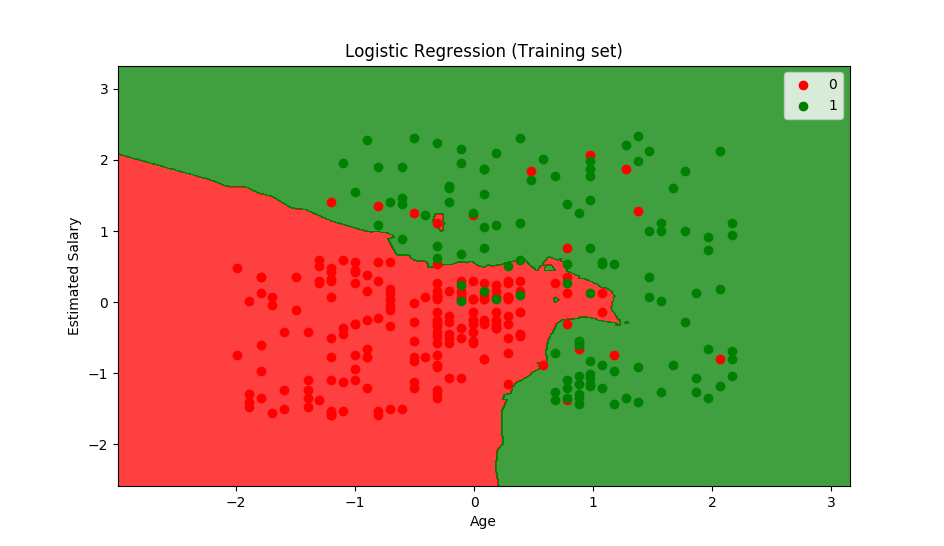

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [9]:
# Step 7: Visualisation
%matplotlib notebook

# Visualising the Training set results
## Conclusion:
    # red for No buying SUV car
    # green for Yes for buying SUV car
    # less age with less salary don't buy SUV car
    # More age with more salary buy SUV car
    # There are outliers that shows less age with high salary & more age with less saary buy SUV
    # This graph is arbitrary to chooes upon k-nearest neighbour.

from matplotlib.colors import ListedColormap   # class to colorize data points
X_set, y_set = X_train, y_train
#  making grid from start-end by placing each pixel of size 0.01 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),  # age
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))  # salary
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), # to colorize of each pixel if point=0 > red, point=1 > green 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# To plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


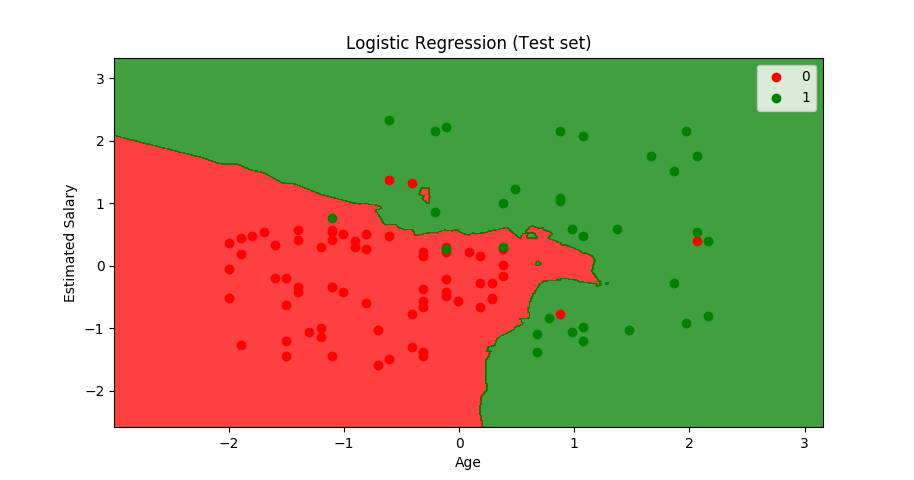

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [10]:
# Visualising the Test set results
## Conclusion:
    # red for No buying SUV car
    # green for Yes for buying SUV car
    # less age with less salary don't buy SUV car
    # More age with more salary buy SUV car
    # There are outliers that shows less age with high salary & more age with less saary buy SUV
    # This graph is arbitrary to chooes upon k-nearest neighbour.
    
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()